# 1. Load 
## 1.1 Load libraries

In [1]:
!pip install rdkit
!pip install gensim
!pip install mol2vec

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for rdkit from https://files.pythonhosted.org/packages/d2/f3/9125802d1403f56fc6d758dbec3a66fae6ad7023d396ecf5a29af27c78aa/rdkit-2024.3.6-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 9.6 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/de/63/776ee55c773f55fa9d4fc1596f2e5e15de109921a6727dfe29cc4f0baeb7/gensim-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━

## 1.2 Load data
The dataset is cleaned and filtered the the family of interest.

In [2]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from src.scripts.load_and_save import load_data

# Ligand analysis 
from rdkit import Chem
from rdkit.Chem import Descriptors, Fragments

ModuleNotFoundError: No module named 'rdkit'

In [2]:
df_clean = load_data()
df_clean.head()

/mloscratch/homes/mdupont/other/ada/ada-2024-project-laambada/src/scripts/load_and_save.py:16: DtypeWarning: Columns (17,20,21,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zip_file_path, compression='zip')


,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,Ligand MW,logP,Charge,Aliphatic OH,Aromatic NH,Ester,Ether,Amide,Ketone,Benzene Ring
0,2880,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,0.24,NaN,...,509.614,5.3623,0,0,0,0,1,1,0,2
1,2953,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK3,Homo sapiens,0.25,NaN,...,509.614,5.3623,0,0,0,0,1,1,0,2
2,3039,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,0.41,NaN,...,509.614,5.3623,0,0,0,0,1,1,0,2
3,3041,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK2,Homo sapiens,0.80,NaN,...,493.593,2.8972,0,0,0,0,0,2,0,2
4,3072,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK3,Homo sapiens,0.99,NaN,...,493.593,2.8972,0,0,0,0,0,2,0,2


# 2. Add features

In [3]:
properties = ['Ligand MW', 'logP']	
metrics = ['pKi', 'pIC50']

n_properties = len(properties)
n_metrics = len(metrics)

In [ ]:
'''from src.utils.exploration_and_clean import clean_metrics

try:
    df_clean['IC50 (nM)'] = clean_metrics(df_clean['IC50 (nM)'])
except:
    pass

df_clean['pIC50'] = np.where(
    df_clean['IC50 (nM)'] > 0,  # Only apply log10 to positive values
    -np.log10(df_clean['IC50 (nM)'] * 1e-9),  # Transform to molar and take -log10
    np.nan  # Assign NaN for zero or negative values
)
df_clean['pKi'] = np.where(
    df_clean['Ki (nM)'] > 0,  # Only apply log10 to positive values
    -np.log10(df_clean['Ki (nM)'] * 1e-9),  # Transform to molar and take -log10
    np.nan  # Assign NaN for zero or negative values
)'''

In [5]:
df = df_clean[:2000]

# 3. Characterization via embeddings

In [3]:
df_Mol2Vec = load_data(f'src/data/embeddings_Mol2Vec.csv.zip')
df_Mol2Vec.set_index('Ligand SMILES', inplace=True)

## 1. Characterization of all the ligands of the family

### a. RDKit Descriptors

In [25]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#import seaborn as sns
from tqdm import tqdm

In [26]:
import pandas as pd
import numpy as np
from src.scripts.load_and_save import load_data

In [29]:
# Step 2: Perform PCA
# Standardize the features

def pca_embeddings(df, name):
    scaler = StandardScaler()
    scaled_descriptors = scaler.fit_transform(df)

    # Apply PCA
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(scaled_descriptors)
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
    pca_df['Ligand SMILES'] = df.index
    pca_df.set_index(['Ligand SMILES'], inplace=True)
    pca_df.to_csv(f'src/data/PCA_{name}.csv.zip', 
                                  compression='zip',
                                  encoding='utf-8',
                                  index=True)
    return pca_df, pca_result
df_Mol2Vec, pca_result = pca_embeddings(df_Mol2Vec, 'Mol2Vec')

In [16]:
pca_embeddings(df_Mol2Vec, 'Mol2Vec').to_csv(f'src/data/PCA_Mol2Vec.csv.zip', 
                                  compression='zip',
                                  encoding='utf-8',
                                  index=True)

In [ ]:
df_RDKIT_1 = load_data('src/data/embeddings_RDKIT_descriptors_0_40000.csv.zip')
df_RDKIT_1.set_index('Ligand SMILES', inplace=True)

df_RDKIT_2 = load_data('src/data/embeddings_RDKIT_descriptors_40000_86769.csv.zip')
df_RDKIT_2.set_index('Ligand SMILES', inplace=True)

pd.concat([df_RDKIT_1, df_RDKIT_2]).to_csv(f'src/data/embeddings_RDKIT_descriptors.csv.zip', 
                                  compression='zip',
                                  encoding='utf-8',
                                  index=True)



In [29]:
df_RDKIT_1 = load_data('src/data/embeddings_Morgan_Fingerprint_0_40000.csv.zip')
df_RDKIT_1.set_index('Ligand SMILES', inplace=True)

df_RDKIT_2 = load_data('src/data/embeddings_Morgan_Fingerprint_40000_86769.csv.zip')
df_RDKIT_2.set_index('Ligand SMILES', inplace=True)

pd.concat([df_RDKIT_1, df_RDKIT_2]).to_csv(f'src/data/embeddings_Morgan_Fingerprint.csv.zip', 
                                  compression='zip',
                                  encoding='utf-8',
                                  index=True)


In [42]:
for col in df_RDKIT:
    print(df_RDKIT[col].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [31]:
pca_result.shape

(30249, 3)

#### Save the PCA embeddings

In [17]:
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Ligand SMILES'] = df['Ligand SMILES']
pca_df.set_index(['Ligand SMILES'], inplace=True)
pca_df

,PC1,PC2,PC3
Ligand SMILES,,,
Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C(=O)OC(C)(C)C)nc12,-3.067853,0.960062,7.768844
Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C(=O)OC(C)(C)C)nc12,-2.513283,3.441097,8.980723
Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C(=O)OC(C)(C)C)nc12,13.563571,-1.073759,0.305663
CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2)N2CCNCC2)nc1C=C,12.954264,-0.991739,-0.070006
CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2)N2CCNCC2)nc1C=C,9.283322,-0.070400,-0.079901
Cn1c2nc[nH]c2c(=O)n(C)c1=O,-3.807554,13.011799,-2.661130
Cn1cnc2n(C)c(=O)n(C)c(=O)c12,-3.807554,13.011799,-2.661130
CC(=O)CCCCn1c(=O)n(C)c2ncn(C)c2c1=O,5.129887,-0.932013,-5.884175
OC(c1cnc(s1)[C@@H](Cc1ccc[n+]([O-])c1)c1ccc(OC(F)F)c(OC2CC2)c1)(C(F)(F)F)C(F)(F)F,8.399279,-0.819157,0.085476


In [21]:
#pca_df.to_csv('src/data/RDKIT/ligand_descriptors.csv.zip', 
'''compression='zip',
    encoding='utf-8',
    index=True)'''

pca_df_loaded = load_data('src/data/PCA_Mol2Vec.csv.zip')
pca_df_loaded.head()

,Ligand SMILES,PC1,PC2,PC3
0,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,-3.900988,-2.151169,-0.629261
1,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,-4.529785,1.978218,3.415271
2,Cn1c2nc[nH]c2c(=O)n(C)c1=O,-2.506667,3.458014,-4.166742
3,Cn1cnc2n(C)c(=O)n(C)c(=O)c12,-1.042616,0.252102,-7.489405
4,CC(=O)CCCCn1c(=O)n(C)c2ncn(C)c2c1=O,-0.831969,14.350407,-2.596931


In [22]:
# Step 3: Perform t-SNE

scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(df_Mol2Vec)
tsne = TSNE(n_components=3, random_state=42, verbose=True, n_iter=250, n_jobs=12, perplexity =3)
tsne_result = tsne.fit_transform(scaled_descriptors[:50])


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.001s...
[t-SNE] Computed neighbors for 50 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 2.256114
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.534912
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


In [ ]:
from src.utils.retrieve_family import retrieve_family

uniprot_ids = df_subset["UniProt (SwissProt) Entry Name of Target Chain"].unique()
family_dict = await retrieve_family(uniprot_ids)


100%|██████████| 3/3 [00:00<00:00, 11.31it/s]


NameError: name 'df' is not defined

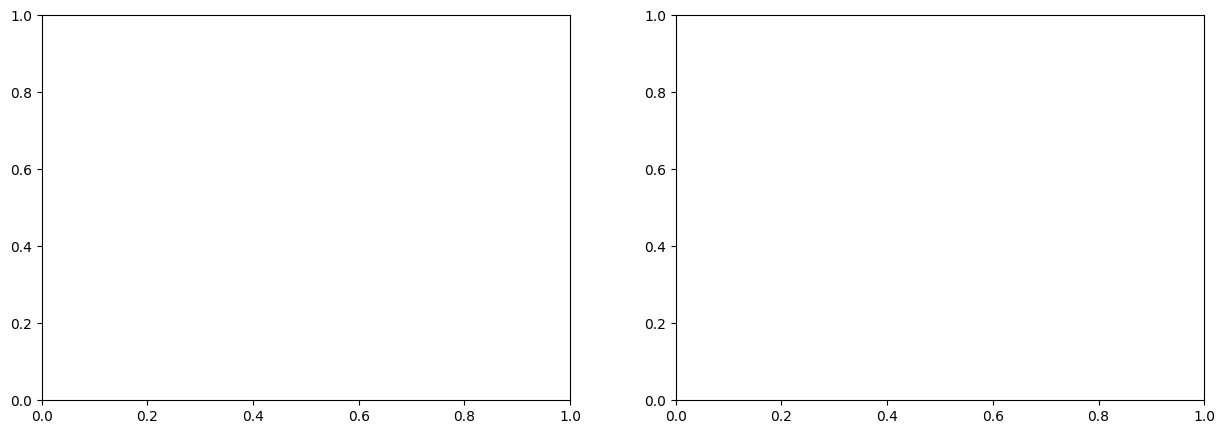

In [35]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#print(f'PCA explained variance ratio: {pca.explained_variance_ratio_}')
# Plot PCA results, color by target name
# Assign each target name a colour (integer)
colour_dict = {name: i for i, name in enumerate(df['Target Name'].unique())}
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c=df['Target Name'].map(colour_dict), cmap='tab20')
ax1.set_title('PCA of Molecular Descriptors')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend(handles=scatter1.legend_elements()[0], labels=family_dict.keys(), title='Target Family')
ax1.grid()
ax1.axis('equal')

# Plot t-SNE results
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, c=df['Target Name'].map(colour_dict), cmap='tab20')
ax2.set_title('t-SNE of Molecular Descriptors')
ax2.set_xlabel('t-SNE dimension 1')
ax2.set_ylabel('t-SNE dimension 2')
ax1.grid()
plt.tight_layout()
plt.show()

# Additional analysis: Feature importance in PCA
'''feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=descriptor_df.columns
)
'''
'''plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance, annot=True, cmap='RdBu', center=0)
plt.title('PCA Feature Importance Heatmap')
plt.tight_layout()
plt.show()'''

##### a.1. Evaluation of the PCA and t-SNE clusters

In [27]:
# Perform K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.stats import mode

In [25]:
pca_data = np.array(list(zip(pca_result[:, 0], pca_result[:, 1])))
tsne_data = np.array(list(zip(tsne_result[:, 0], tsne_result[:, 1])))

In [36]:
## PCA
pca_kmeans = KMeans(n_clusters=3, random_state=0)#TODO : best number of clusters based on the silhouette
pca_kmeans.fit(pca_data)

# Get the cluster labels
pca_labels = pca_kmeans.labels_
pca_centers = pca_kmeans.cluster_centers_

#Visualize the clustering results
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pca_labels, cmap='viridis')
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', marker='x')
plt.title('K-means Clustering on PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'pca_data' is not defined

In [37]:
## tsne
tsne_kmeans = KMeans(n_clusters=3, random_state=0)#TODO : best number of clusters based on the silhouette
tsne_kmeans.fit(tsne_data)

# Get the cluster labels
tsne_labels = tsne_kmeans.labels_
tsne_centers = tsne_kmeans.cluster_centers_

#Visualize the clustering results
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=tsne_labels, cmap='viridis')
plt.scatter(tsne_centers[:, 0], tsne_centers[:, 1], c='red', marker='x')
plt.title('K-means Clustering tsne')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'tsne_data' is not defined

In [28]:
# silhouette of the found clusters
pca_silhouette_avg = silhouette_score(pca_data, pca_labels)
print(f'Silhouette Score pca: {pca_silhouette_avg}')

tsne_silhouette_avg = silhouette_score(tsne_data, tsne_labels)
print(f'Silhouette Score pca: {tsne_silhouette_avg}')


Silhouette Score pca: 0.49698499598255197
Silhouette Score pca: 0.3537749648094177


In [29]:
# average silhouette score for each cluster PCA
# Compute the silhouette scores for each sample
pca_silhouette_vals = silhouette_samples(pca_data, pca_labels)

# Calculate the average silhouette score for each cluster
pca_cluster_silhouette_avg = {}
for cluster in np.unique(pca_labels):
    pca_cluster_silhouette_avg[cluster] = np.mean(pca_silhouette_vals[pca_labels == cluster])

# Print the average silhouette score for each cluster
print('For PCA')
for cluster, silhouette_avg in pca_cluster_silhouette_avg.items():
    print(f'Cluster {cluster}: Average Silhouette Score = {silhouette_avg}')


For PCA
Cluster 0: Average Silhouette Score = 0.4511368379023438
Cluster 1: Average Silhouette Score = 0.4429566542895881
Cluster 2: Average Silhouette Score = 0.588983511621145


In [30]:
# average silhouette score for each cluster for t-sne
# Compute the silhouette scores for each sample
tsne_silhouette_vals = silhouette_samples(tsne_data, tsne_labels)

# Calculate the average silhouette score for each cluster
tsne_cluster_silhouette_avg = {}
for cluster in np.unique(pca_labels):
    tsne_cluster_silhouette_avg[cluster] = np.mean(tsne_silhouette_vals[pca_labels == cluster])

# Print the average silhouette score for each cluster
print('For t-SNE')
for cluster, silhouette_avg in tsne_cluster_silhouette_avg.items():
    print(f'Cluster {cluster}: Average Silhouette Score = {silhouette_avg}')


For t-SNE
Cluster 0: Average Silhouette Score = 0.3392579257488251
Cluster 1: Average Silhouette Score = 0.33595460653305054
Cluster 2: Average Silhouette Score = 0.3836471140384674


In [31]:
def calculate_purity(cluster_labels, true_labels):
    clusters = np.unique(cluster_labels)
    majority_sum = 0
    for cluster in clusters:
        true_labels_in_cluster = true_labels[cluster_labels == cluster]
        majority_label = np.unique(true_labels_in_cluster, return_counts=True)
        majority_sum += np.sum(true_labels_in_cluster == majority_label)
    purity = majority_sum / len(true_labels)
    return purity

In [32]:
# purity of the clusters based on ground truth labels
true_labels = df['Target Name']

pca_purity = calculate_purity(pca_labels, true_labels)
print(f'Purity PCA: {pca_purity}')

tsne_purity = calculate_purity(tsne_labels, true_labels)
print(f'Purity tsne: {tsne_purity}')

Purity PCA: 0.0
Purity tsne: 0.0


#### b. Mol2vec 

To detect more global and subtile (but less interpretable) differences we use here a pretrained Mol2vec available here : https://github.com/samoturk/mol2vec/tree/master/examples/models 


This model  was trained on 20 million compounds downloaded from ZINC using:
- radius 1
- UNK to replace all identifiers that appear less than 4 times
- skip-gram and window size of 10 
- resulting in 300 dimensional embeddings

Mol2Vec is inspired by Word2vec and it creates embeddings based on the structural and chemical information of the molecules using a substructure approach. 

In [10]:
import os
from gensim.models import Word2Vec
from mol2vec.features import mol2alt_sentence

ImportError: libXrender.so.1: cannot open shared object file: No such file or directory

In [ ]:
def get_mol2vec_descriptors(mol, model) : 
    """ Get the mol2vec descriptors for a molecule """
    identifier = mol2alt_sentence(mol, 1)
    embeddings = [model.wv[token] for token in identifier if token in model.wv]
    val = np.mean(embeddings, axis=0)
    return val
     

In [ ]:
pretrained_model_path = os.path.join(os.getcwd(), 'model_300dim.pkl') 
model = Word2Vec.load(pretrained_model_path)
print('number of unique identifiers', len(model.wv.key_to_index))

execution_times = []

mol2vec_embeddings = []
for mol in tqdm(df_subset['RDKIT Molecules'].dropna()):
    start_time = time.time()
    mol2vec_embeddings.append(get_mol2vec_descriptors(mol, model))
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calculer les statistiques
mean_time = np.mean(execution_times)
std_time = np.std(execution_times)

print(f"Mean execution time: {mean_time} seconds")
print(f"Standard deviation: {std_time} seconds")
print(f"Estimation for the full dataset: {round(len(df_bindingDB)*mean_time/60)} minutes")

# Padding to ensure same size
mol2vec_descriptors_df = pd.DataFrame(mol2vec_embeddings)

number of unique identifiers 21003


  0%|          | 0/21 [00:00<?, ?it/s][17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECA

Mean execution time: 0.00421777225676037 seconds
Standard deviation: 0.012885149519600507 seconds
Estimation for the full dataset: 0 minutes


In [ ]:

# Step 2: Perform PCA
# Standardize the features
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(mol2vec_descriptors_df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_descriptors)

In [ ]:
# Step 3: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, verbose=True, n_iter=250, n_jobs=12, perplexity =3)
tsne_result = tsne.fit_transform(scaled_descriptors)


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 6.786056
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.393387
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


c:\Users\Laura\anaconda3\envs\ADA\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

print(f'PCA explained variance ratio: {pca.explained_variance_ratio_}')
# Plot PCA results, color by target name
# Assign each target name a colour (integer)
colour_dict = {name: i for i, name in enumerate(df_subset['Target Name'].unique())}
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c=df_subset['Target Name'].map(colour_dict), cmap='tab20')
ax1.set_title('PCA of Molecular Descriptors')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend(handles=scatter1.legend_elements()[0], labels=family_dict.keys(), title='Target Family')
ax1.grid()
ax1.axis('equal')

# Plot t-SNE results
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, c=df_subset['Target Name'].map(colour_dict), cmap='tab20')
ax2.set_title('t-SNE of Molecular Descriptors')
ax2.set_xlabel('t-SNE dimension 1')
ax2.set_ylabel('t-SNE dimension 2')
ax1.grid()
plt.tight_layout()
plt.show()

# Additional analysis: Feature importance in PCA
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=mol2vec_descriptors_df.columns
)


NameError: name 'plt' is not defined

##### c. Morgan Fingerprints (ECFP) 

Morgan fingerprint captures the local environment around each atom up to a specified radius. 

In [11]:
from rdkit.Chem import AllChem

In [12]:
def get_ecfp_descriptors(mol, radius=2, nBits=1024) : 
    val = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
    return val

In [ ]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

morgan_generator = GetMorganGenerator(radius=2, fpSize=1024)

def get_ecfp_descriptors(mol, radius=2, nBits=1024):
    # Use the global generator for efficiency
    val = morgan_generator.GetFingerprint(mol)
    return val

ecfp_rad2 = [morgan_generator.GetFingerprint(mol) for mol in molecules_series]
ecfp_embeddings = [get_ecfp_descriptors(mol) for mol in molecules_series[:1000]]

In [ ]:
ecfp_embeddings[0]
ecfp_descriptors_list = [list(fp) for fp in ecfp_embeddings]
len(ecfp_descriptors_list)

1000

In [42]:
ecfp_descriptors_df = pd.DataFrame(ecfp_descriptors_list)
len(ecfp_descriptors_list[0])

1024

In [51]:
np.nan

nan

In [10]:
ecfp_descriptors_df = descriptor_df_loaded

In [11]:
# Generate Morgan Fingerprints (ECFP) with radius=2 and 1024 bits (ECFP4)
ecfp_rad2 = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024) for mol in molecules_series]
df['ecfp_rad2'] = ecfp_rad2

execution_times = []
ecfp_embeddings = []
print(f'Start {len(df)} samples')
for mol in tqdm(molecules_series[:100].dropna()):
    if len(execution_times) % 50 == 0:
        print(f'{len(execution_times)} steps')
    start_time = time.time()
    ecfp_embeddings.append(get_ecfp_descriptors(mol))
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calculer les statistiques
mean_time = np.mean(execution_times)
std_time = np.std(execution_times)

print(f"Mean execution time: {mean_time} seconds")
print(f"Standard deviation: {std_time} seconds")
#print(f"Estimation for the full dataset: {round(len(df_bindingDB)*mean_time/60)} minutes")

# Padding to ensure same size
#Convert ExplicitBitVect to list
ecfp_descriptors_list = [list(fp) for fp in ecfp_embeddings]

ecfp_descriptors_df = pd.DataFrame(ecfp_descriptors_list)

NameError: name 'molecules_series' is not defined

In [47]:
# Step 2: Perform PCA
# Standardize the features
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(ecfp_descriptors_list)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_descriptors)

In [44]:
# Step 3: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, verbose=True, n_iter=250, n_jobs=12, perplexity =3)
tsne_result = tsne.fit_transform(scaled_descriptors)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.006s...
[t-SNE] Computed neighbors for 1000 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 5.426874


KeyboardInterrupt: 

In [ ]:
i

In [13]:
import matplotlib.pyplot as plt

PCA explained variance ratio: [0.0217251  0.01801867 0.01743953]


/tmp/ipykernel_72311/527694389.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5,  cmap='tab20') #c=df['Target Name'].map(colour_dict),


NameError: name 'tsne_result' is not defined

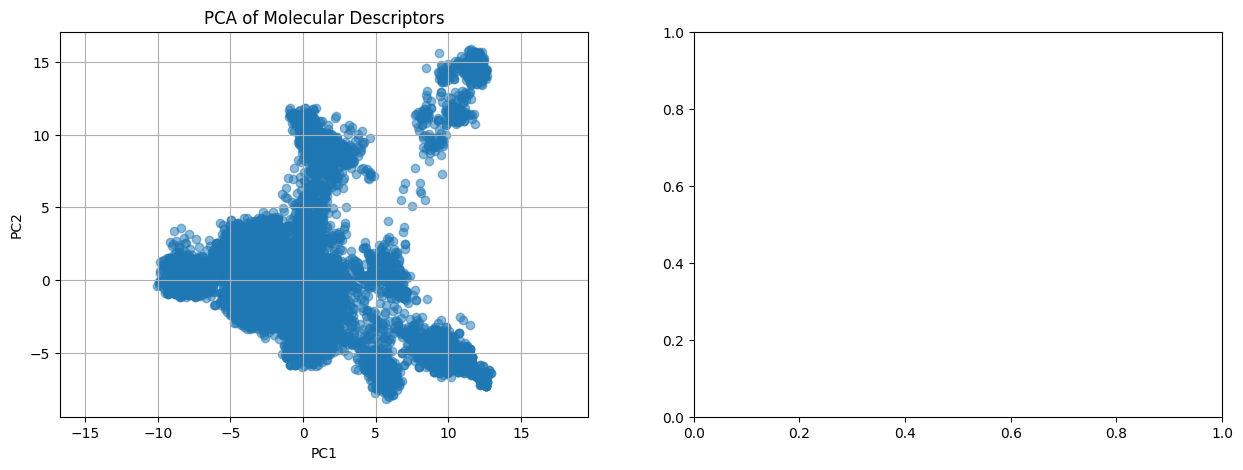

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

print(f'PCA explained variance ratio: {pca.explained_variance_ratio_}')
# Plot PCA results, color by target name
# Assign each target name a colour (integer)
#colour_dict = {name: i for i, name in enumerate(df['Target Name'].unique())}
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5,  cmap='tab20') #c=df['Target Name'].map(colour_dict),
ax1.set_title('PCA of Molecular Descriptors')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
#ax1.legend(handles=scatter1.legend_elements()[0], labels=family_dict.keys()) #, title='Target Family'
ax1.grid()
ax1.axis('equal')

# Plot t-SNE results
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5,cmap='tab20') # c=df['Target Name'].map(colour_dict), 
ax2.set_title('t-SNE of Molecular Descriptors')
ax2.set_xlabel('t-SNE dimension 1')
ax2.set_ylabel('t-SNE dimension 2')
ax1.grid()
plt.tight_layout()
plt.show()

# Additional analysis: Feature importance in PCA
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=ecfp_descriptors_df.columns
)


In [36]:
pca_result

array([[-10.56972757,  18.05098568],
       [ -6.91781748,  -3.62641374],
       [ -2.28584566,  -3.9461446 ],
       [ -2.09395243,  -3.42566731],
       [ -2.54502674,  -3.65499134],
       [ 14.16221461,   4.32319855],
       [ 14.16221461,   4.32319855],
       [  0.76056684,  -3.29038502],
       [ -2.74487358,  -4.14494649],
       [ -1.9277526 ,  -4.60883428]])

In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from src.scripts.load_and_save import load_data
from src.utils.exploration_and_clean import explore_column, quick_check_column, clean_metrics

'''from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
'''

'from plotly.subplots import make_subplots\nimport plotly.graph_objects as go\nimport plotly.express as px\n'

In [ ]:
def get_mol2vec_descriptors(mol, model) : 
    """ Get the mol2vec descriptors for a molecule """
    identifier = mol2alt_sentence(mol, 1)
    embeddings = [model.wv[token] for token in identifier if token in model.wv]
    val = np.mean(embeddings, axis=0)
    return val
     

In [ ]:
pretrained_model_path = os.path.join(os.getcwd(), 'model_300dim.pkl') 
model = Word2Vec.load(pretrained_model_path)
print('number of unique identifiers', len(model.wv.key_to_index))

execution_times = []

mol2vec_embeddings = []
for mol in tqdm(df_subset['RDKIT Molecules'].dropna()):
    start_time = time.time()
    mol2vec_embeddings.append(get_mol2vec_descriptors(mol, model))
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calculer les statistiques
mean_time = np.mean(execution_times)
std_time = np.std(execution_times)

print(f"Mean execution time: {mean_time} seconds")
print(f"Standard deviation: {std_time} seconds")
print(f"Estimation for the full dataset: {round(len(df_bindingDB)*mean_time/60)} minutes")

# Padding to ensure same size
mol2vec_descriptors_df = pd.DataFrame(mol2vec_embeddings)

number of unique identifiers 21003


  0%|          | 0/21 [00:00<?, ?it/s][17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECATION WARNING: please use MorganGenerator
[17:08:04] DEPRECA

Mean execution time: 0.00421777225676037 seconds
Standard deviation: 0.012885149519600507 seconds
Estimation for the full dataset: 0 minutes


In [ ]:

# Step 2: Perform PCA
# Standardize the features
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(mol2vec_descriptors_df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_descriptors)

In [ ]:
# Step 3: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, verbose=True, n_iter=250, n_jobs=12, perplexity =3)
tsne_result = tsne.fit_transform(scaled_descriptors)


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 6.786056
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.393387
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


c:\Users\Laura\anaconda3\envs\ADA\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


PCA explained variance ratio: [0.21102089 0.18200676]


C:\Users\Laura\AppData\Local\Temp\ipykernel_9568\1953359015.py:11: UserWarning: Mismatched number of handles and labels: len(handles) = 1 len(labels) = 7
  ax1.legend(handles=scatter1.legend_elements()[0], labels=family_dict.keys(), title='Target Family')


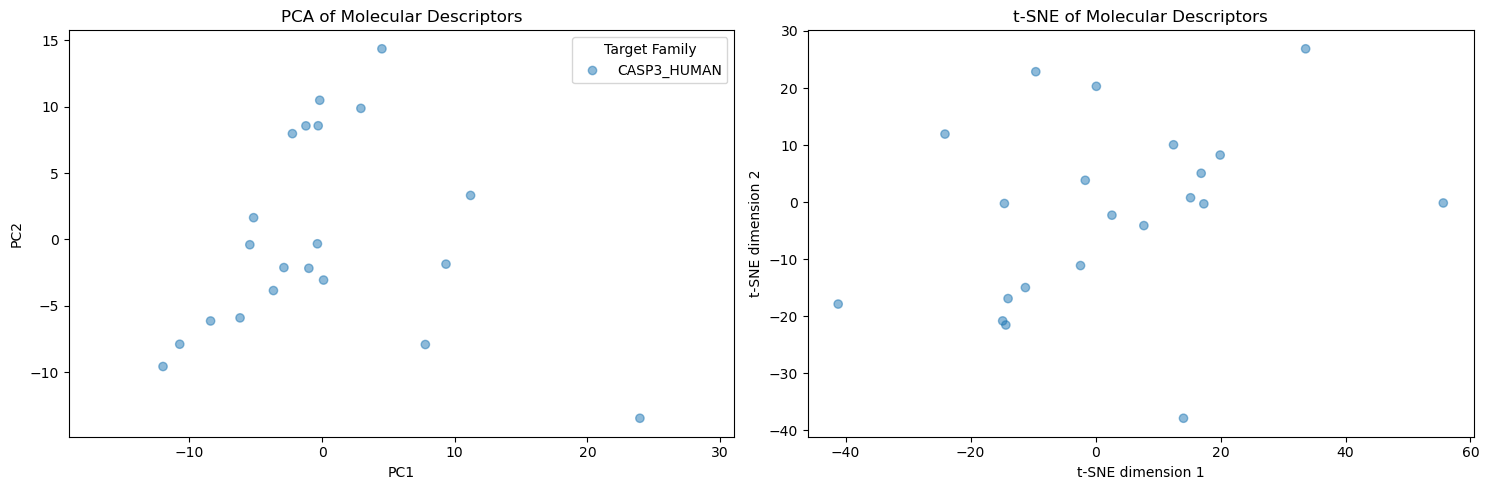

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

print(f'PCA explained variance ratio: {pca.explained_variance_ratio_}')
# Plot PCA results, color by target name
# Assign each target name a colour (integer)
colour_dict = {name: i for i, name in enumerate(df_subset['Target Name'].unique())}
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c=df_subset['Target Name'].map(colour_dict), cmap='tab20')
ax1.set_title('PCA of Molecular Descriptors')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend(handles=scatter1.legend_elements()[0], labels=family_dict.keys(), title='Target Family')
ax1.grid()
ax1.axis('equal')

# Plot t-SNE results
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, c=df_subset['Target Name'].map(colour_dict), cmap='tab20')
ax2.set_title('t-SNE of Molecular Descriptors')
ax2.set_xlabel('t-SNE dimension 1')
ax2.set_ylabel('t-SNE dimension 2')
ax1.grid()
plt.tight_layout()
plt.show()

# Additional analysis: Feature importance in PCA
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=mol2vec_descriptors_df.columns
)
